# Libraries

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import import_ipynb
from EDAClass import Eda
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calmap
import math

## File: customerDemographic

In [2]:
customerAddress = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress', header=1)

In [3]:
customerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


### Missing Values

In [4]:
customerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [5]:
customerAddress.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

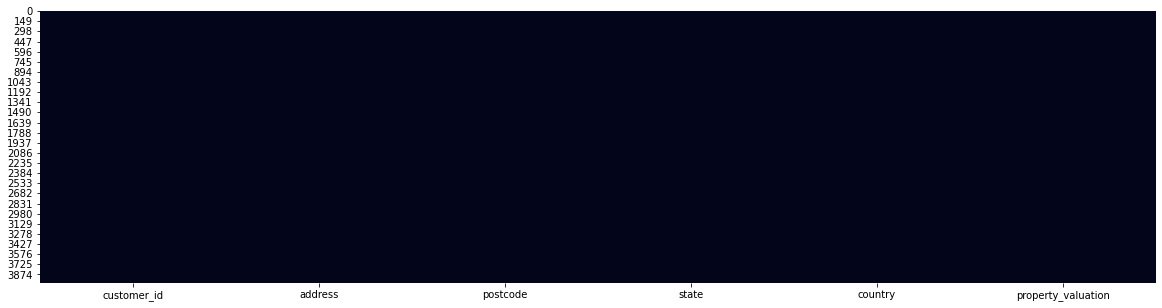

In [6]:
plt.figure(figsize=(20,5))
sns.heatmap(customerAddress.isnull(), cbar=False)
plt.show()

### Duplicated Rows

In [7]:
#newCustomerList[newCustomerList.duplicated(keep=False)]
customerAddress[customerAddress.duplicated() == True]

,customer_id,address,postcode,state,country,property_valuation


### Unique Values

In [8]:
for i in customerAddress.columns:
    print('Unique {}:'.format(i), customerAddress[i].unique().shape)

Unique customer_id: (3999,)
Unique address: (3996,)
Unique postcode: (873,)
Unique state: (5,)
Unique country: (1,)
Unique property_valuation: (12,)


In [9]:
cols= ['state', 'property_valuation']
for i in cols:
    print('Unique {}:\n'.format(i), customerAddress[i].unique())
    print('')

Unique state:
 ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']

Unique property_valuation:
 [10  9  4 12  8  6  7  3  5 11  1  2]



### Description

In [10]:
customerAddress.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [11]:
customerAddress.describe(include=['O'])

,address,state,country
count,3999,3999,3999
unique,3996,5,1
top,3 Talisman Place,NSW,Australia
freq,2,2054,3999


### Histograms

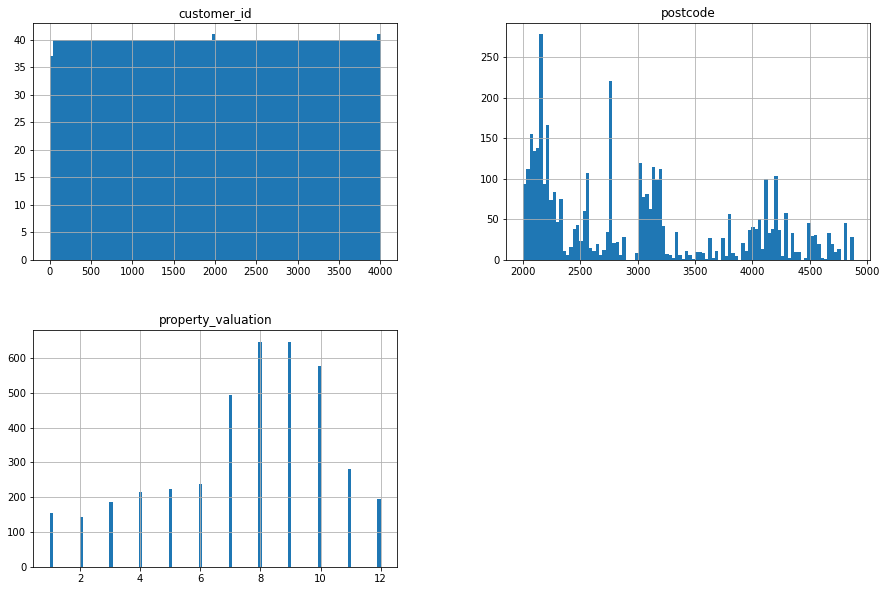

In [12]:
customerAddress.hist(figsize=(15,10), bins=100)
plt.show()

In [13]:
df_cat = df_cat['state'].value_counts().unstack(level=1).plot.bar() 

NameError: name 'df_cat' is not defined

### Trend Chart

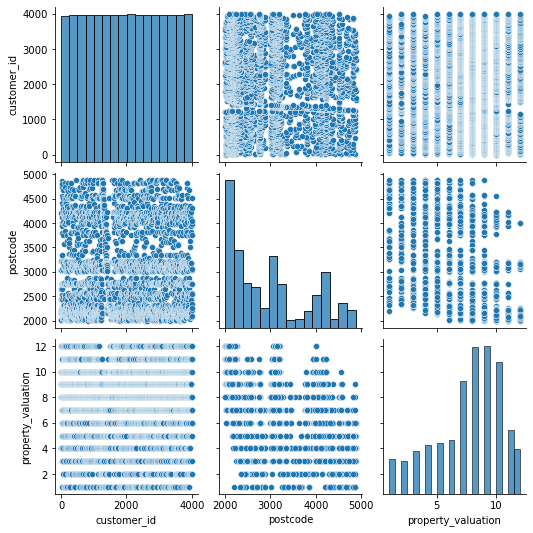

In [16]:
sns.pairplot(customerAddress)

### Pandas Report

In [17]:
ProfileReport(customerAddress)